<div style="text-align: justify;
text-justify: inter-word; font-size: 18px;">

Experiment Setup:

The following rusults correspond to an extreme case of *pure shear-dominant* ABL, where sensible and latent heat are nullified:<br>

Sensible Heat Flux, SHF=0 *$W/m^{2}$*<br> 

Latent Heat, LHF = 0 *$W/m^{2}$*<br>

Friction velocity $u_{*}$ was intesified from 0.25 m/s to 0.65 m/s. 

The initial wind velocity profiles were given by the relationships: *$u(z) = 6.5 + {2 {z} \over {1000}}$* (m/s)  and  *$v(z) = -8.5 +{{5z} \over {1000}}$* (m/s). 

The cloud layer extens from 500 to 795 m and the domain top is set at 1500, with buffer layer applied between 1250-1500 m.
</div>  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import matplotlib.colors as mcolors
%matplotlib inline

<div style="text-align: justify;
text-justify: inter-word; font-size: 19px;">
The 128 vertical levels (heights) are written in 'Z0' ASCII file continuously. Values are reshaped into 1D vector.
</div>

In [ ]:
f1=pd.read_csv("Z0",header=None, on_bad_lines="warn",delimiter="   ",engine="python")
z=f1.to_numpy()
z=z.reshape(132,1)
z=z[0:128,:]

<div style="text-align: justify;
text-justify: inter-word; font-size: 18px;">
Post-proccessed spatially-averaged verical profiles are written every ~300s. The first 8 simulation hours are considered as spin-up time and are not included in the analysis. Mean profiles are also written continuously in 'PRO' ASCII files and reshaped in 2D aarays with u,z coordinates. 
</div>

In [3]:
with open("U_s.pro.0000","r") as f2:
    lines=[line for line in f2 if line.strip()]
total_lines=len(lines)
skip_rows=[0]+list(range(1,total_lines,24))

u=pd.read_csv("U_s.pro.0000",header=None,comment='#',on_bad_lines="warn",engine="python",skiprows=skip_rows,delimiter="   ",dtype=str)
U=pd.DataFrame(u)
U=U.replace('None',np.nan)
U=U.apply(pd.to_numeric,errors='coerce')
U=U.to_numpy()
U=U.reshape(95,132)
u_m=U[94,0:128]

<div style="text-align: justify;
text-justify: inter-word; font-size: 18px;">
Reading 3D instataneous velocity fileds with horizontal resolution of 50m. 
</div>

In [4]:
f3=pd.read_csv("U_3s.28800",header=None,on_bad_lines='warn',delimiter="   ",engine="python",dtype=str)
U3d=pd.DataFrame(f3)
U3d=U3d.replace('None',np.nan)
U3d=U3d.apply(pd.to_numeric,errors='coerce')
U3d=U3d.to_numpy()
U3d=U3d.reshape(1213764,1)
U3d=U3d[0:1213761,:]
u3d=U3d.reshape(129,97,97)
u3d=u3d[0:128,:,:]
x=np.arange(0,4850,50)
y=np.arange(0,4850,50)

<div style="text-align: justify;
text-justify: inter-word; font-size: 20px;">

Turbulance calculation from 3D instantaneous fields where $\tilde{u}$ is spatially-averaged quantity: *$u'=u-\tilde{u}$* .
</div>

In [5]:
u=u3d-u_m[:,np.newaxis,np.newaxis]

<div style="text-align: justify;
text-justify: inter-word; font-size: 20px;">
Data visualization
</div>

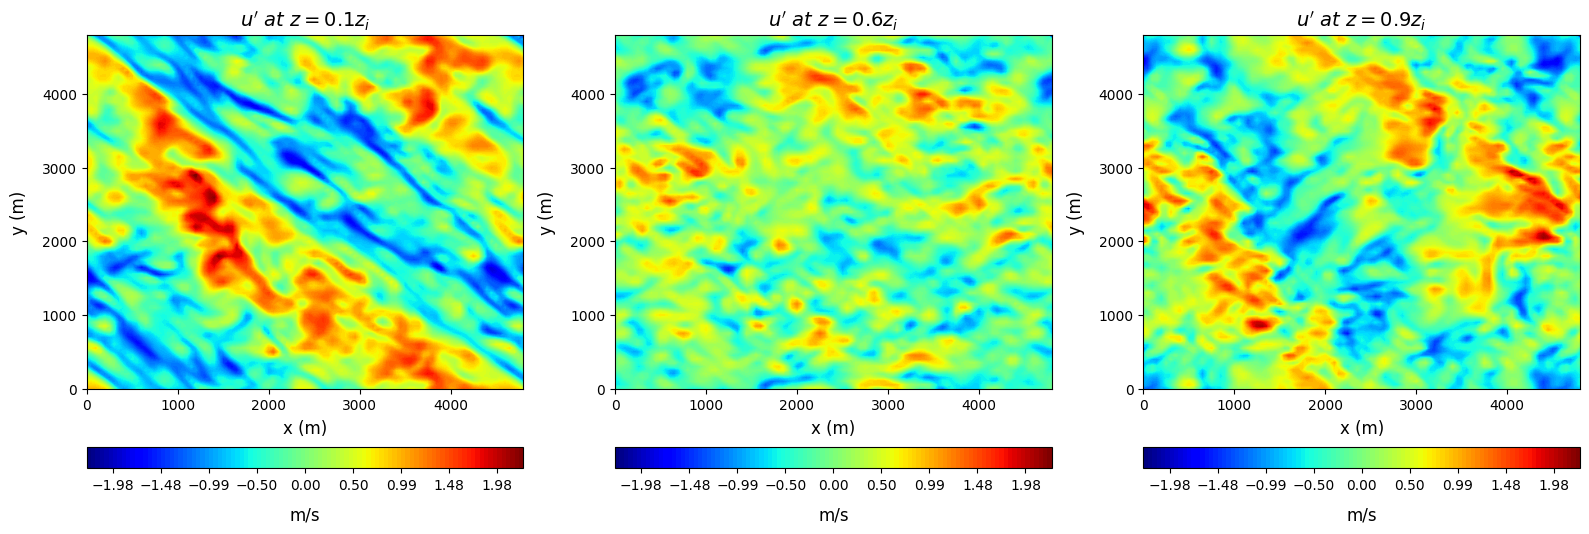

In [6]:
u=[u[14,:,:],u[40,:,:],u[70,:,:]]
vmin=-2.25
vmax=2.25
bounds=np.linspace(vmin,vmax,101)
for i in range(len(bounds)):
    bounds[i]=round(bounds[i],2)
cmap=plt.get_cmap("jet",100) 
norm=mcolors.BoundaryNorm(boundaries=bounds,ncolors=100)

fig,axs=plt.subplots(1,3,figsize=(16,5.5))
for i in range(0,3):
   cf=axs[i].contourf(x,y,u[i],levels=bounds,cmap=cmap)
   cbar=fig.colorbar(cf,ax=axs[i],orientation='horizontal',pad=0.12)
   cbar.set_label("m/s",fontsize=12,labelpad=10,rotation=0)
   axs[i].set_ylabel("y (m)",fontsize=12,labelpad=10)
   axs[i].set_xlabel("x (m)",fontsize=12,labelpad=5)
axs[0].set_title("$u'$ $at$ $z=0.1z_{i}$",fontsize=14)
axs[1].set_title("$u'$ $at$ $z=0.6z_{i}$",fontsize=14)
axs[2].set_title("$u'$ $at$ $z=0.9z_{i}$",fontsize=14)
plt.tight_layout()
plt.show()

<div style="text-align: justify;
text-justify: inter-word; font-size: 19px;">
Results and discussion<br>

Coherent elongated "streaks" of velocity appeared, consisting of regions with positive and negative fluctuations of the velocity field in both lower an upper levels of ABL. These distinct streaks have also been observed in all wall-bounded shear turbulent flows *(Kline et all., 1967)* and other LES simulations *(Moeng C-H, Sullivan PP, 1994)* and  *(Khanna S, Brasseur JG, 1998)*. They are driven by streamwise counter-rotating vortices; streaks of negative velocity fluctutions are related to the upward-moving flow of vortices, while the streaks of positive fluctuations correspond to the downward-moving flow of vortices.
</div> 

![My image](https://github.com/ChrisPhys97/LES/raw/main/image.png) 

<div style="text-align: justify;
text-justify: inter-word; font-size: 19px;">
In shear, as can be seen in the picture above, slower fluid moving upward induces negative velocity flactuations, meaning that slows down the mean flow. Conversly, faster fluid moving downward induces positive velocity flactuations, which accelerates then mean flow. Since counter-rotating vortices extend all over the domain (small rolls), the upward and downward moving fluid has equal extend resuling the "streak" structures of fluctuating velocity field.<br>

Above the surface layer, streaks have spanwise width larger than the boundary layer thickness. At the mid-ABL (below the cloud layer) streaks dissapear and only random, small-scale velocity fluctuations are observed. However close to the ABL top (within the cloud layer) wider streaks of shorter streamwise length scale are observed again. The reason behind this mid-level disappearance is that the shear is vanished and ABL is well mixed.
</div>

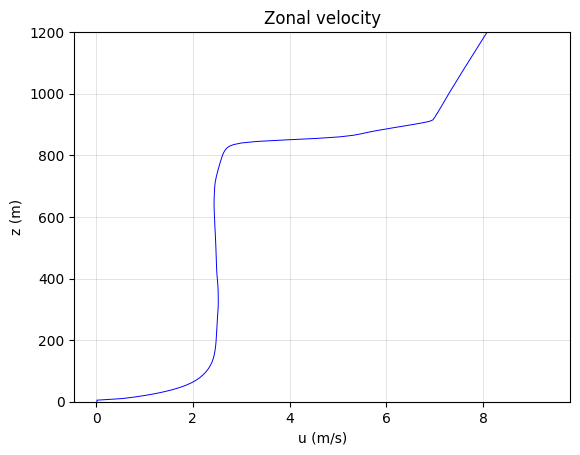

In [7]:
plt.plot(u_m,z,color="blue",linewidth=0.7)
plt.xlabel("u (m/s)")
plt.ylabel("z (m)")
plt.title("Zonal velocity")
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.ylim([0, 1200])
plt.show()

<div style="text-align: justify;
text-justify: inter-word; font-size: 18px;">
As can be seen in the figure above, shear is observed at first 200 m and at cloud top between 750 and 850 m. The greater the shear the more elongated are the streaks (Lee et all., 1990) and this is the reason why in this simulation streak stractures are more intese and elongated near surface. Finally, it is worth mentioning that our case is not pure shear-dominant ABL even though SHF and LHF have been nullified. The presence of cloud layer produces negative boyancy flux due to its radiative cooling on top resulting in downdrafts that break when reaching the surface, resulting in the formation of updrafts.
</div> 